------------------------------
Concluded
------------------------------


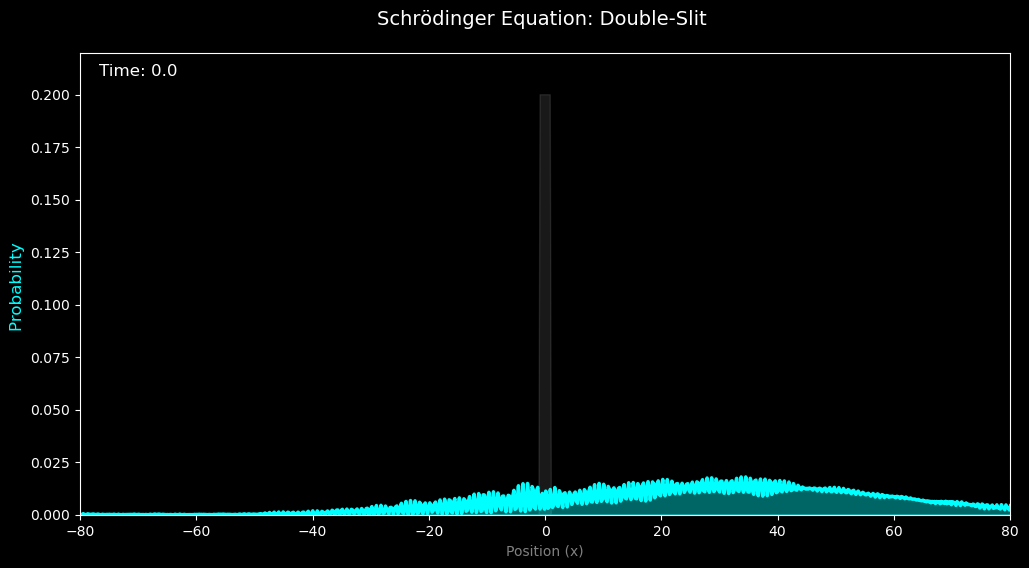

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter, FuncAnimation
import matplotlib.style as style
import os
#FFmeg ayarını son kez gözden geçirmem gerek !
if os.path.exists('/opt/anaconda3/bin/ffmpeg'):
    plt.rcParams['animation.ffmpeg_path'] = '/opt/anaconda3/bin/ffmpeg'
elif os.path.exists('/usr/local/bin/ffmpeg'):
    plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'
elif os.path.exists('/opt/homebrew/bin/ffmpeg'):
    plt.rcParams['animation.ffmpeg_path'] = '/opt/homebrew/bin/ffmpeg'

style.use('dark_background') 
fig, ax = plt.subplots(figsize=(12, 6))

#Parameters
N = 1024           
L = 200.0          
x = np.linspace(-L/2, L/2, N)
dx = x[1] - x[0]
dt = 0.05          
x0 = -50.0         
k0 = 4.0           
sigma = 3.0        
V0 = 1000.0        
w_wall = 2.0       
w_slit = 1.5       
d_sep = 6.0        


V = np.zeros(N)
mask_wall = (np.abs(x) < w_wall / 2)
V[mask_wall] = V0
mask_slit1 = (np.abs(x - d_sep/2) < w_slit / 2)
V[mask_slit1] = 0
mask_slit2 = (np.abs(x + d_sep/2) < w_slit / 2)
V[mask_slit2] = 0

psi = np.exp(-((x - x0)**2) / (2 * sigma**2)) * np.exp(1j * k0 * x)
psi /= np.sqrt(np.sum(np.abs(psi)**2) * dx)
k = 2 * np.pi * np.fft.fftfreq(N, d=dx)
U_V = np.exp(-1j * V * dt / 2)
U_K = np.exp(-1j * (k**2) * dt)

ax.set_xlim(-80, 80)
ax.set_ylim(0, 0.22)
ax.set_title("Schrödinger Equation: Double-Slit ", fontsize=14, color='white', pad=20)
ax.set_xlabel("Position (x)", color='gray')
# İSTEK: Sol tarafa Probability yazısı
ax.set_ylabel(r"Probability ", color='#00ffff', fontsize=12)
ax.grid(False)
ax.fill_between(x, 0, V/V0 * 0.2, color='white', alpha=0.1, label='Barrier')
line, = ax.plot([], [], color='#00ffff', lw=2.5)
fill_obj = None 
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, color='white', fontsize=12)

def animate(frame):
    global psi, fill_obj
    steps_per_frame = 2 
    
    for _ in range(steps_per_frame):
        psi = U_V * psi
        psi = np.fft.ifft(U_K * np.fft.fft(psi))
        psi = U_V * psi
    
    prob_density = np.abs(psi)**2

    line.set_data(x, prob_density)
    if fill_obj: fill_obj.remove()
    fill_obj = ax.fill_between(x, 0, prob_density, color='#00ffff', alpha=0.4)
    
    time_text.set_text(f'Time: {frame*dt*steps_per_frame:.1f}')
    return line, time_text

try:
    ani = FuncAnimation(fig, animate, frames=600, interval=20, blit=False)
    
    writer = FFMpegWriter(fps=30, bitrate=2500, extra_args=['-vcodec', 'libx264'])
    
    output_file = 'quantum.mp4'
    ani.save(output_file, writer=writer, dpi=200)
    
    print("-" * 30)
    print("Concluded")
    print("-" * 30)

except Exception as e:
    print(f"\n BİR HATA OLUŞTU:\n{e}")
    print("Lütfen terminalden 'conda install ffmpeg' komutunu tekrar kontrol edin.")